<a href="https://colab.research.google.com/github/24361994/24361994/blob/main/imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##aqui vamos a importar las librerias necesarias

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 
import glob 
import datetime 
import random 
from tqdm.notebook import tqdm 
from PIL import Image 
from PIL import ImageEnhance 
np.random.seed (1) 
#pd.set_option ('display.max_colwidth', Ninguno)

aqui se enlaza gdrive con colab para extraer las imagenes, le das correr y el link te va a dar un codigo, lo pegas y esta enlazado.

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


aqui desde mi drive, en la carpeta color, obtengo todas las imagenes .jpg que comienzan con grape

In [29]:
glob.glob('/gdrive/My Drive/color/Grape*/*.JPG',recursive=True) [0]


'/gdrive/My Drive/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/14ba628c-fdec-4788-869f-9c759de1c97d___FAM_L.Blight 1480.JPG'

aqui realizo un conteo de todas las imagenes grape que hay

In [31]:
paths = glob.glob('/gdrive/My Drive/color/Grape*/*.JPG',recursive=True)
len(paths)

4062

ahora elegimos 20 imagenes al azar, si se quiere seguir hasta el paso de clasificación se deben usar todas las 4062

In [33]:
paths = random.sample(paths,20)
paths

['/gdrive/My Drive/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/7627e2c9-5659-415a-a915-30ab5128e3c9___FAM_L.Blight 0804.JPG',
 '/gdrive/My Drive/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/e1743dca-30aa-455b-948a-de897c69a5f1___FAM_L.Blight 4888.JPG',
 '/gdrive/My Drive/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/6de7714a-0a56-4510-8088-3962b457a4fd___FAM_L.Blight 4580.JPG',
 '/gdrive/My Drive/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/a9f431ae-3982-48bb-a6c6-82194562dcb0___FAM_L.Blight 3692.JPG',
 '/gdrive/My Drive/color/Grape___Black_rot/40f7f974-67d0-4a8d-b1b8-386007854643___FAM_B.Rot 0471.JPG',
 '/gdrive/My Drive/color/Grape___Esca_(Black_Measles)/eb1341ea-8de0-426b-a4c8-2bec44952caa___FAM_B.Msls 1036.JPG',
 '/gdrive/My Drive/color/Grape___Esca_(Black_Measles)/0bf809ec-841e-4668-b875-adeb73d60de0___FAM_B.Msls 4057.JPG',
 '/gdrive/My Drive/color/Grape___Black_rot/e4276ce3-ffbc-4203-9b52-cc75d6a6b8df___FAM_B.Rot 3115.JPG',
 '/gdrive/My Drive/color/Grape___Black_r

aqui se usa el metodo `imagen.open()` para abrir imagenes de estas rutas y guardarlas en una matriz Numpy

In [39]:
orig=np.array([np.asarray(Image.open(img)) for img in paths])
orig.shape

(20, 256, 256, 3)

de `orig.shape` podemos ver que tenemos 20 imagenes de dimensión 256x256, con tres canales de color (R,G,B).

pero en comando que viene primero se ven el tamaño de la figura, con una funcion i que parte desde 0, se genera un ciclo for que me dice que para las img en orig se traiga del 0 al 16. y que despues me plotee en 4 filas y 4 columnas, donde el i+1 sera la funcion que me diga que ya llegue a 4 y pare ahi de colocar imagenes

le digo que no tenga grilla y que i debe ser mayor o igual a 1 para que parta el ciclo for y no coloque 17 imagenes en vez de 16

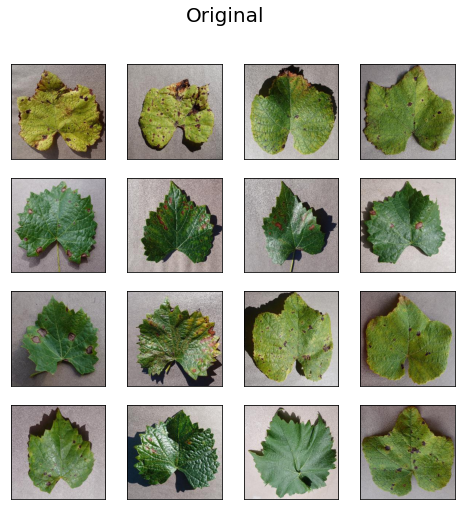

In [46]:
plt.figure (figsize = (8,8))
i = 0
for img in orig [0:16]:
    plt.subplot (4, 4, i+1)
    plt.xticks ([])
    plt.yticks ([])
    plt.grid (False)
    plt.imshow(img)
    i += 1
plt.suptitle("Original", fontsize=20)
plt.show()

aqui se van a mejorar las caracteristicas de las imagenes con imageEnhance del metodo PIL, donde se mejorara el color, contraste, brillo y forma.

In [60]:
contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in orig]

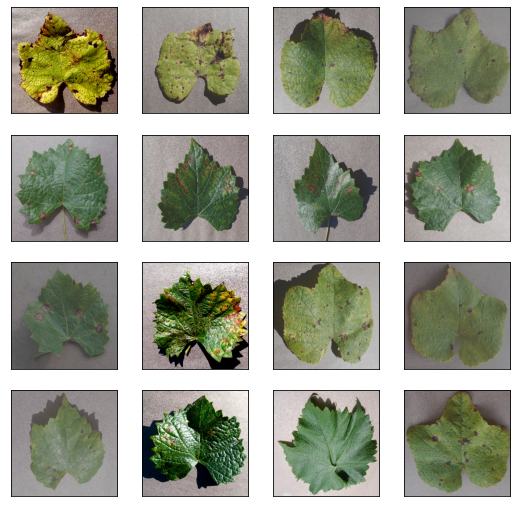

In [61]:
plt.figure(figsize=(9,9))
i=0
for img in contrast[0:16]:
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i += 1
plt.show()

Para cada `img` en `orig`, en primer lugar cargar la imagen de la `img` matriz (que especifica el canal de color como “RGB”. A continuación, mejorar el contraste por un valor aleatorio de [0, 0,5, 1, 1,25, 1,5] `( np.linspace(0.5, 1.5, 5)` elegirán cinco valores linealmente espaciados entre 0 y 1,5) Finalmente, guardamos esta imagen como una matriz dentro de la `contrast` lista.

Las imágenes con un factor de mejora <1 se ven más grises, mientras que aquellas con un factor> 1 están más saturadas. Aquellos con un factor = 1 no serán diferentes del original

aqui mejoramos el brillo

In [62]:
brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast]


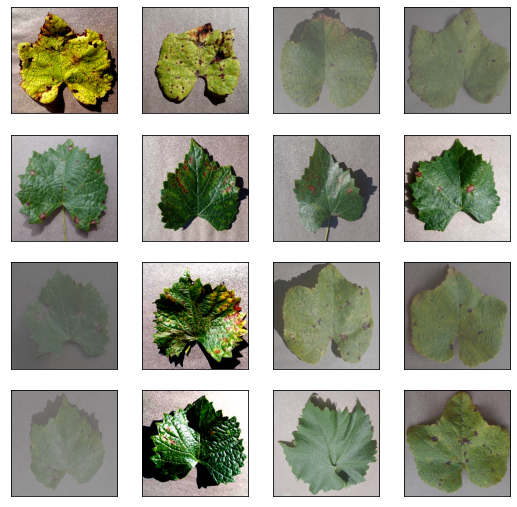

In [63]:
plt.figure(figsize=(9,9))
i=0
for img in brightness[0:16]:
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i += 1
plt.show()

aqui mejoramos la forma

In [64]:
sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness]


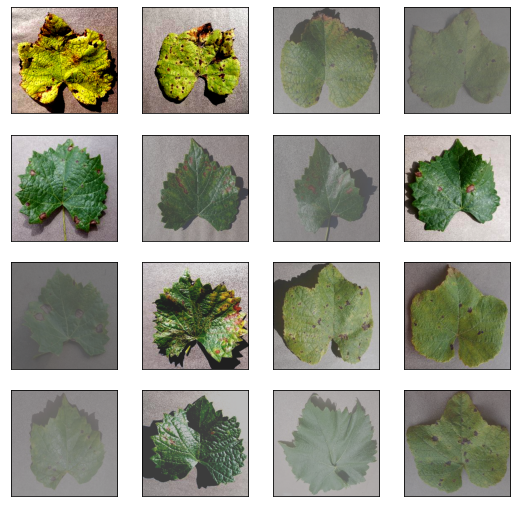

In [65]:
plt.figure(figsize=(9,9))
i=0
for img in sharpness[0:16]:
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i += 1
plt.show()

aqui mejoramos el color

In [66]:
color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness]

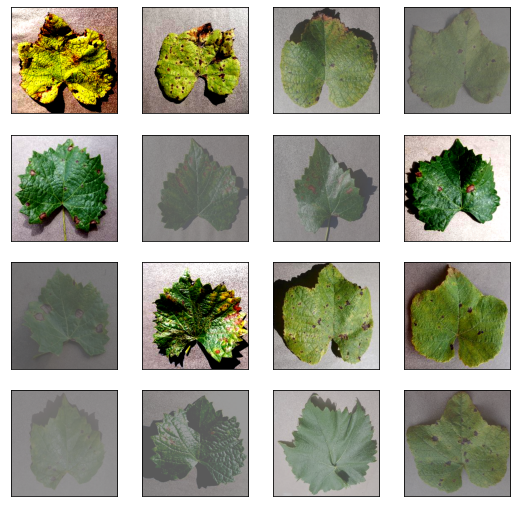

In [67]:
plt.figure(figsize=(9,9))
i=0
for img in color[0:16]:
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i += 1
plt.show()

a continuación
Para voltear, usaremos `cv2.flip()`.  Toma la imagen y un valor entre 0, 1 y -1. Para 0, se voltea verticalmente; para 1, se voltea horizontalmente; y para -1, se voltea tanto horizontal como verticalmente. Podemos aleatorizar estos valores para aleatorizar el giro, y también podemos aleatorizar la elección de si la imagen se invertirá o no.

In [68]:
flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color]

Si `np.random.choice([0, 1])` es 0, no volteamos y devolvemos la entrada; de lo contrario, cambiamos dependiendo de `np.random.choice([0, 1, -1])`.

In [69]:
rotate = [Image.fromarray(img, 'RGB').rotate(np.random.choice([0, 90, 180, 270])) for img in flip]

Girar es sencillo. Cargamos la imagen de la matriz de imágenes y la giramos tantos grados como queramos. Para evitar tener que rellenar, rotaremos aleatoriamente las imágenes 0 (sin rotación), 90, 180 o 270 grados:

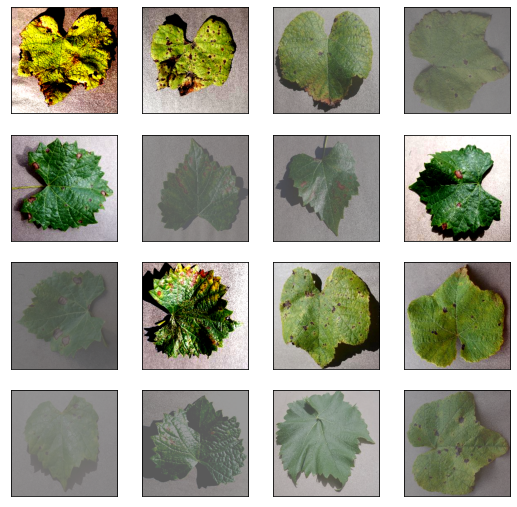

In [70]:
plt.figure(figsize=(9,9))
i=0
for img in rotate[0:16]:
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i += 1
plt.show()

con este ultimo codigo se guardan los archivos en otra carpeta con las mejoras, yo lo guarde como imagenes parte1, se ve en mis archivos de google drive

In [72]:
import os
for i, image in tqdm(enumerate(rotate)):
  directory = paths[i].rsplit('/', 3)[0] + '/imagenes parte1/' + paths[i].rsplit('/', 2)[1]+ '/'
  os.makedirs(directory, exist_ok = True)
  image.save(directory + paths[i].rsplit('/', 2)[2])

aqui se les saca el color a todas las imagenes guardadas en las matriz de imagenes array y me dice que hay 20 imagenes en escala de grises

In [78]:
gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in tqdm (orig)])
gray.shape

(20, 256, 256)

aqui el enumerate es como una ruta donde guarde las imagenes, pero le estoy diciendo que sean en gris

#recordar probar contrastes y rotaciones antes de visualizar para poder encontrar esa matriz con valores de 0 y 255

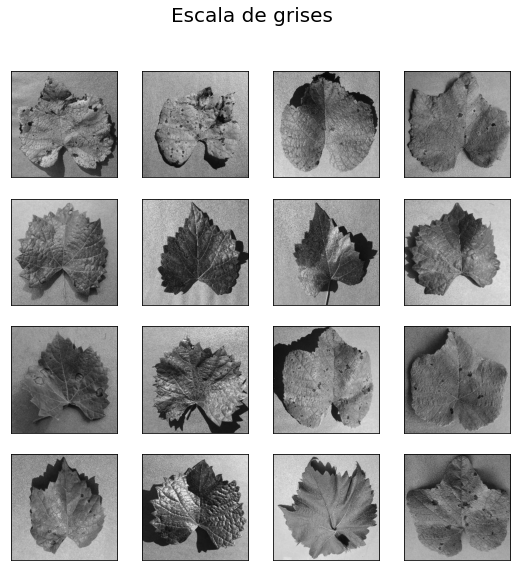

In [83]:
plt.figure (figsize = (9,9))
for i, img in enumerate (gray [0:16]): 
    plt.subplot (4,4, i + 1) 
    plt.xticks ([]) 
    plt.yticks ([]) 
    plt.grid (False) 
    plt.imshow (cv2.cvtColor (img, cv2.COLOR_GRAY2RGB))
plt.suptitle ("Escala de grises", fontsize=20) 
plt.show ()

aqui con esta matriz se deberia ver los valores que den 255 seran blancos y lo que den 0 seran negros. es como se ve la imagen en forma de matriz

In [84]:
gray[0]

array([[174, 164, 156, ..., 130, 139, 132],
       [171, 175, 177, ..., 122, 109, 132],
       [157, 168, 177, ..., 122, 101, 137],
       ...,
       [130, 129, 138, ..., 112, 110, 110],
       [129, 129, 137, ..., 117, 112, 109],
       [138, 134, 139, ..., 117, 112, 107]], dtype=uint8)

In [85]:
thresh = [cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)[1] for img in tqdm(gray)]

In [86]:
thresh[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

esto deberia haberme salido en escala de grises, pero se entiende el resultado xd

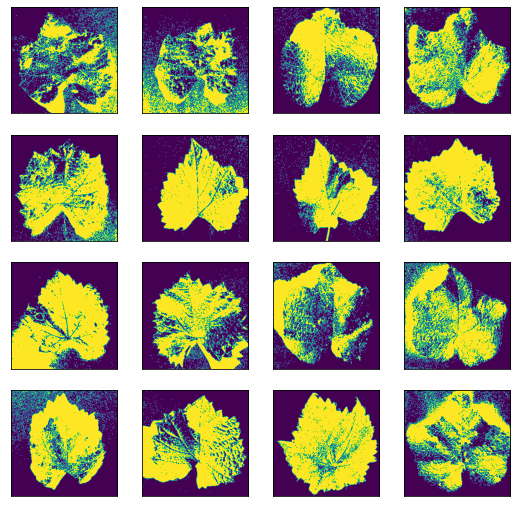

In [90]:
plt.figure(figsize=(9,9))
i=0
for img in thresh[0:16]:
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i += 1
plt.show()

#aqui comienza la detección de bordes

openCV permite implementar esto usando el algoritmo Canny

Dilate es una técnica de eliminación de ruido que ayuda a unir las partes rotas de un borde para que formen un contorno continuo.

In [93]:
edges = [cv2.dilate(cv2.Canny(img, 0, 255), None) for img in tqdm(thresh)]

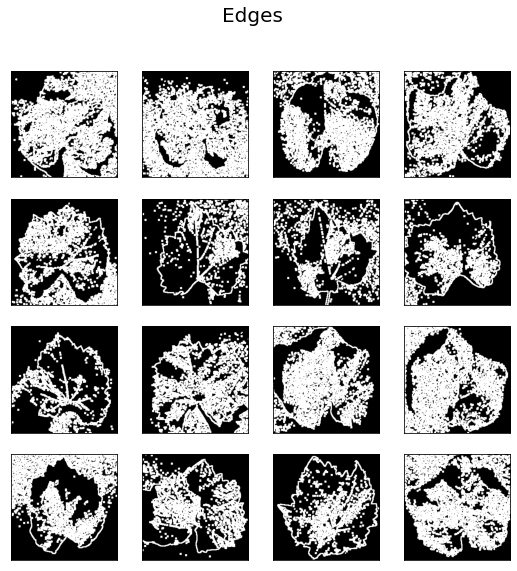

In [94]:
plt.figure(figsize=(9,9))
for i, edge in enumerate(edges[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB))
plt.suptitle("Edges", fontsize=20)
plt.show()